# Signal Transforms
- **Purpose**: Transform signals between different domains
- **scipy.fft, scipy.signal**: FFT, DCT, Hilbert, Wavelet concepts
- **Applications**: Compression, feature extraction, analysis

Key concepts:
- **Fourier Transform**: Time ↔ Frequency domain
- **DCT**: Discrete Cosine Transform (image/audio compression)
- **Hilbert Transform**: Analytic signal, envelope, phase
- **Short-Time FT**: Time-localized frequency analysis
- **Wavelet**: Multi-resolution time-frequency analysis

Real applications:
- **Finance**: Trend-cycle decomposition, regime detection
- **Audio**: MP3 compression (DCT), pitch detection
- **Communications**: Modulation analysis, carrier extraction
- **Biomedical**: Heart rate variability, breathing rate
- **Image**: JPEG compression, edge detection

In [1]:
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Signal transforms module loaded")

Signal transforms module loaded


## Discrete Cosine Transform (DCT)

**Purpose**: Express signal as sum of cosine functions

**Advantages over DFT**:
- Real-valued (no complex numbers)
- Better energy compaction
- Used in JPEG, MP3, video compression

**Key property**: Most signal energy in few coefficients

**Function**: `fft.dct(signal, type=2)` and `fft.idct(coeffs, type=2)`

DCT for Signal Compression
  Signal length: 1000 samples

Compression:
  Kept coefficients: 100/1000 (10%)
  Compression ratio: 10.0:1
  Reconstruction SNR: 40.38 dB



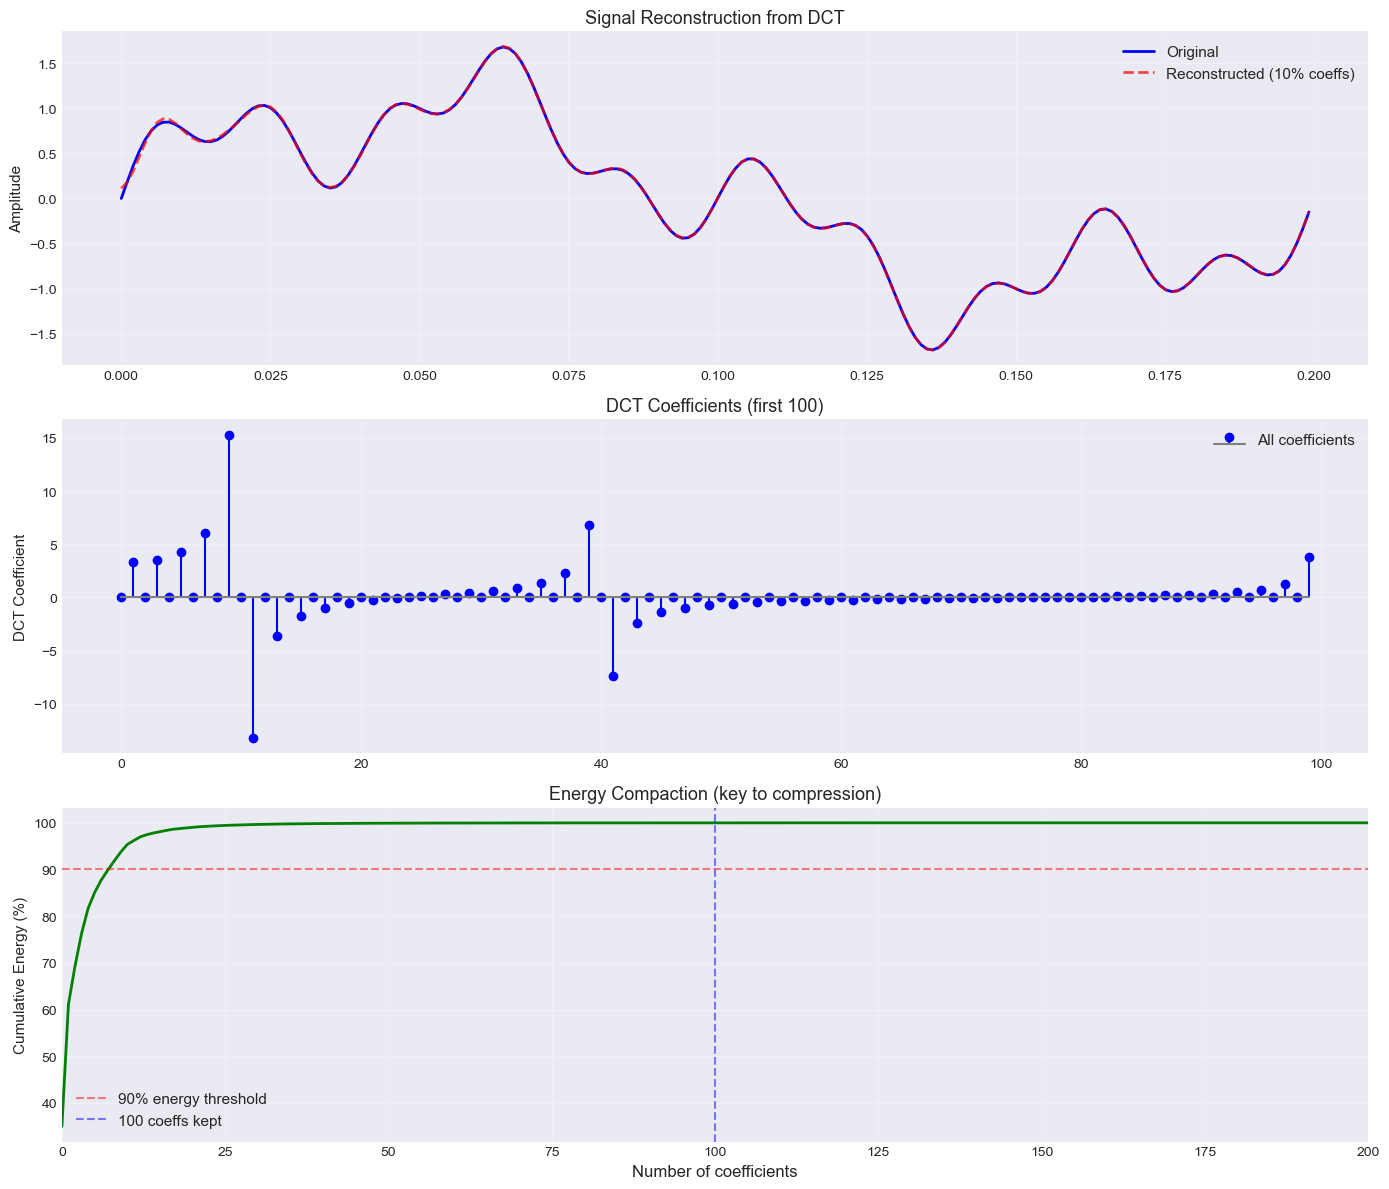

DCT compression enables:
  - JPEG image compression
  - MP3 audio compression
  - Video compression (H.264, etc.)

Most energy in 100 coefficients!


In [2]:
# Signal with multiple frequencies
fs = 1000
t = np.linspace(0, 1, fs)
sig = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*20*t) + 0.3*np.sin(2*np.pi*50*t)

print("DCT for Signal Compression")
print(f"  Signal length: {len(sig)} samples\n")

# DCT
dct_coeffs = fft.dct(sig, type=2, norm='ortho')

# Compress: Keep only top 10% coefficients
keep_ratio = 0.10
n_keep = int(len(dct_coeffs) * keep_ratio)

# Zero out small coefficients
threshold_idx = np.argsort(np.abs(dct_coeffs))[::-1][n_keep:]
dct_compressed = dct_coeffs.copy()
dct_compressed[threshold_idx] = 0

# Reconstruct
sig_reconstructed = fft.idct(dct_compressed, type=2, norm='ortho')

# Calculate compression ratio and error
compression_ratio = len(sig) / n_keep
mse = np.mean((sig - sig_reconstructed)**2)
snr = 10 * np.log10(np.var(sig) / mse)

print(f"Compression:")
print(f"  Kept coefficients: {n_keep}/{len(sig)} ({keep_ratio*100:.0f}%)")
print(f"  Compression ratio: {compression_ratio:.1f}:1")
print(f"  Reconstruction SNR: {snr:.2f} dB\n")

# Visualize
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Original vs reconstructed
axes[0].plot(t[:200], sig[:200], 'b-', linewidth=2, label='Original')
axes[0].plot(t[:200], sig_reconstructed[:200], 'r--', linewidth=2,
            alpha=0.7, label='Reconstructed (10% coeffs)')
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Signal Reconstruction from DCT', fontsize=13)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# DCT coefficients
axes[1].stem(dct_coeffs[:100], linefmt='b-', markerfmt='bo', basefmt='gray',
            label='All coefficients')
axes[1].set_ylabel('DCT Coefficient', fontsize=11)
axes[1].set_title('DCT Coefficients (first 100)', fontsize=13)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Energy distribution
energy = np.abs(dct_coeffs)**2
energy_sorted = np.sort(energy)[::-1]
cumulative_energy = np.cumsum(energy_sorted) / np.sum(energy) * 100
axes[2].plot(cumulative_energy, 'g-', linewidth=2)
axes[2].axhline(90, color='red', linestyle='--', alpha=0.5,
               label='90% energy threshold')
axes[2].axvline(n_keep, color='blue', linestyle='--', alpha=0.5,
               label=f'{n_keep} coeffs kept')
axes[2].set_xlabel('Number of coefficients', fontsize=12)
axes[2].set_ylabel('Cumulative Energy (%)', fontsize=11)
axes[2].set_title('Energy Compaction (key to compression)', fontsize=13)
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, 200)

plt.tight_layout()
plt.show()

print("DCT compression enables:")
print("  - JPEG image compression")
print("  - MP3 audio compression")
print("  - Video compression (H.264, etc.)")
print(f"\nMost energy in {n_keep} coefficients!")

## Hilbert Transform

**Purpose**: Create analytic signal (complex signal with no negative frequencies)

**Analytic signal**: z(t) = x(t) + j·H[x(t)]
- Real part: Original signal
- Imaginary part: Hilbert transform

**Applications**:
- **Envelope detection**: |z(t)| = amplitude envelope
- **Instantaneous phase**: ∠z(t)
- **Instantaneous frequency**: d(phase)/dt

**Function**: `signal.hilbert(x)`

Hilbert Transform: Envelope Detection
  Carrier frequency: 50 Hz
  Modulation frequency: 5 Hz

Extracted:
  Envelope (amplitude modulation)
  Instantaneous phase
  Instantaneous frequency



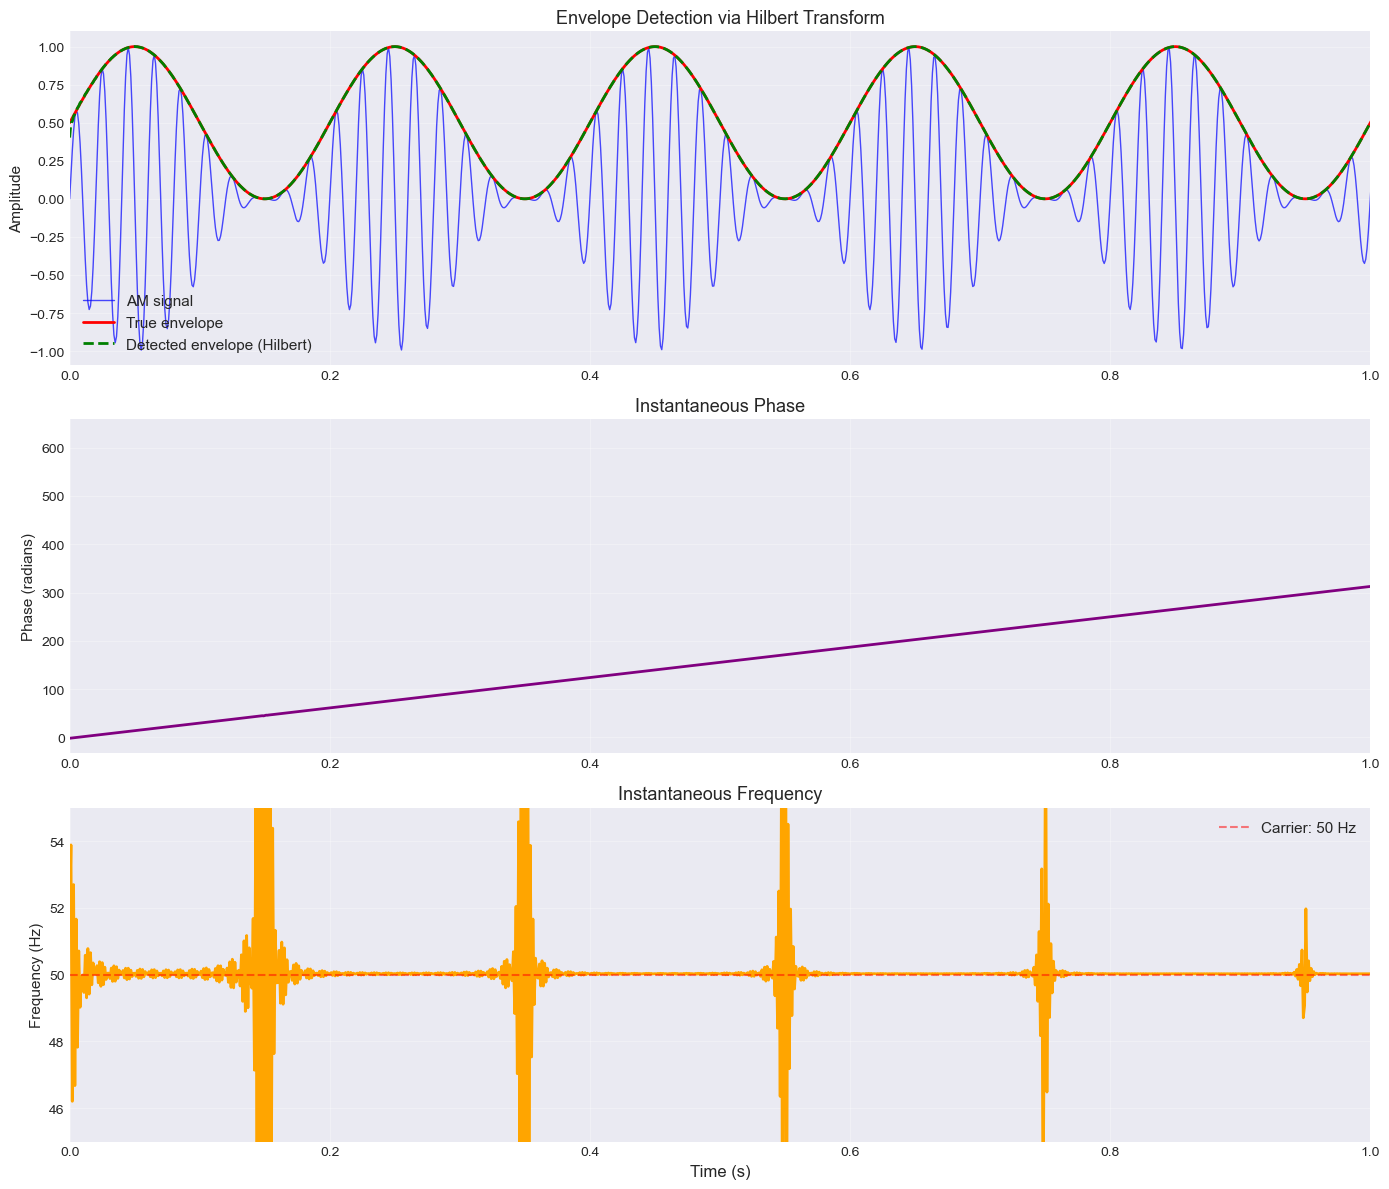

Applications:
  - Demodulation (AM radio)
  - Heart rate from ECG
  - Breathing rate from sensors
  - Vibration analysis


In [3]:
# Amplitude modulated signal
fs = 1000
t = np.linspace(0, 2, 2*fs)

# Carrier: 50 Hz
carrier_freq = 50
carrier = np.sin(2*np.pi*carrier_freq*t)

# Modulation: 5 Hz envelope
mod_freq = 5
envelope = 0.5 + 0.5*np.sin(2*np.pi*mod_freq*t)

# Amplitude modulated signal
am_signal = envelope * carrier

print("Hilbert Transform: Envelope Detection")
print(f"  Carrier frequency: {carrier_freq} Hz")
print(f"  Modulation frequency: {mod_freq} Hz\n")

# Hilbert transform
analytic_signal = signal.hilbert(am_signal)
envelope_detected = np.abs(analytic_signal)
phase = np.angle(analytic_signal)
inst_freq = np.diff(np.unwrap(phase)) / (2*np.pi) * fs

print("Extracted:")
print(f"  Envelope (amplitude modulation)")
print(f"  Instantaneous phase")
print(f"  Instantaneous frequency\n")

# Visualize
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# AM signal with envelope
axes[0].plot(t, am_signal, 'b-', linewidth=1, alpha=0.7, label='AM signal')
axes[0].plot(t, envelope, 'r-', linewidth=2, label='True envelope')
axes[0].plot(t, envelope_detected, 'g--', linewidth=2,
            label='Detected envelope (Hilbert)')
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Envelope Detection via Hilbert Transform', fontsize=13)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 1)

# Instantaneous phase
axes[1].plot(t, np.unwrap(phase), 'purple', linewidth=2)
axes[1].set_ylabel('Phase (radians)', fontsize=11)
axes[1].set_title('Instantaneous Phase', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 1)

# Instantaneous frequency
axes[2].plot(t[:-1], inst_freq, 'orange', linewidth=2)
axes[2].axhline(carrier_freq, color='red', linestyle='--', alpha=0.5,
               label=f'Carrier: {carrier_freq} Hz')
axes[2].set_xlabel('Time (s)', fontsize=12)
axes[2].set_ylabel('Frequency (Hz)', fontsize=11)
axes[2].set_title('Instantaneous Frequency', fontsize=13)
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, 1)
axes[2].set_ylim(45, 55)

plt.tight_layout()
plt.show()

print("Applications:")
print("  - Demodulation (AM radio)")
print("  - Heart rate from ECG")
print("  - Breathing rate from sensors")
print("  - Vibration analysis")

## Real Example: Stock Price Trend-Cycle Decomposition

**Problem**: Separate trend from oscillations in price data

**Method**: Hilbert transform to extract instantaneous amplitude

**Use case**:
- Trend strength indicator
- Cycle phase for timing entries
- Regime detection (trending vs ranging)

**Application**: Adaptive trading systems

In [4]:
# Simulate stock price: trend + cycle
np.random.seed(42)
days = np.arange(252)  # Trading year

# Trend component
trend = 100 + 0.15*days

# Cycle component (20-day period)
cycle_period = 20
cycle = 8 * np.sin(2*np.pi*days/cycle_period - np.pi/2)

# Noise
noise = np.random.randn(252) * 1.5

# Combined
price = trend + cycle + noise

print("Stock Price Trend-Cycle Decomposition")
print(f"  252 trading days")
print(f"  Cycle period: {cycle_period} days")
print(f"  Price range: ${price.min():.2f} - ${price.max():.2f}\n")

# First, bandpass filter to isolate cycle (10-30 days)
fs = 1  # 1 sample per day
# Convert period to frequency: f = 1/T
f_low = 1/30  # 30-day period
f_high = 1/10  # 10-day period
sos = signal.butter(3, [f_low, f_high], btype='band', fs=fs, output='sos')
cycle_filtered = signal.filtfilt(sos[0], sos[1], price)

# Hilbert transform of filtered signal
analytic = signal.hilbert(cycle_filtered)
envelope = np.abs(analytic)
phase = np.angle(analytic)

# Trend estimate (lowpass)
sos_trend = signal.butter(2, 1/50, btype='low', fs=fs, output='sos')
trend_est = signal.filtfilt(sos_trend[0], sos_trend[1], price)

print("Decomposition results:")
print(f"  Trend extracted (50-day smoothing)")
print(f"  Cycle isolated (10-30 day bandpass)")
print(f"  Cycle envelope computed (Hilbert)")
print(f"  Cycle phase extracted\n")

# Trading signals based on phase
# Buy when phase ~ -π/2 (cycle bottom)
# Sell when phase ~ π/2 (cycle top)
buy_signal = (phase > -np.pi/2 - 0.3) & (phase < -np.pi/2 + 0.3)
sell_signal = (phase > np.pi/2 - 0.3) & (phase < np.pi/2 + 0.3)

# Visualize
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Price decomposition
axes[0].plot(days, price, 'gray', linewidth=1, alpha=0.5, label='Price')
axes[0].plot(days, trend_est, 'b-', linewidth=2, label='Trend')
axes[0].plot(days, trend_est + envelope, 'r--', linewidth=1.5,
            alpha=0.7, label='Cycle envelope')
axes[0].plot(days, trend_est - envelope, 'r--', linewidth=1.5, alpha=0.7)
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].set_title('Trend-Cycle Decomposition via Hilbert Transform', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Cycle and envelope
axes[1].plot(days, cycle_filtered, 'b-', linewidth=1.5, label='Filtered cycle')
axes[1].plot(days, envelope, 'r-', linewidth=2, label='Cycle strength (envelope)')
axes[1].plot(days, -envelope, 'r-', linewidth=2)
axes[1].axhline(0, color='gray', linestyle='--', alpha=0.3)
axes[1].set_ylabel('Amplitude ($)', fontsize=12)
axes[1].set_title('Cycle Component and Strength', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Phase and trading signals
axes[2].plot(days, phase, 'purple', linewidth=2, label='Cycle phase')
axes[2].scatter(days[buy_signal], phase[buy_signal], c='green', s=100,
               marker='^', label='Buy signal (cycle bottom)', zorder=5)
axes[2].scatter(days[sell_signal], phase[sell_signal], c='red', s=100,
               marker='v', label='Sell signal (cycle top)', zorder=5)
axes[2].axhline(-np.pi/2, color='green', linestyle='--', alpha=0.3)
axes[2].axhline(np.pi/2, color='red', linestyle='--', alpha=0.3)
axes[2].set_xlabel('Trading Day', fontsize=12)
axes[2].set_ylabel('Phase (radians)', fontsize=12)
axes[2].set_title('Cycle Phase → Trading Signals', fontsize=14)
axes[2].legend(fontsize=11, loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Trading strategy:")
print(f"  Buy signals: {buy_signal.sum()} (at cycle troughs)")
print(f"  Sell signals: {sell_signal.sum()} (at cycle peaks)")
print("\nHilbert transform enables cycle-based timing!")

Stock Price Trend-Cycle Decomposition
  252 trading days
  Cycle period: 20 days
  Price range: $92.33 - $146.64



IndexError: index 1 is out of bounds for axis 0 with size 1

## Short-Time Fourier Transform (STFT)

**Problem**: Standard FFT loses time information

**Solution**: Apply FFT to overlapping windows

**Result**: Time-frequency representation
- Rows: Frequencies
- Columns: Time windows
- Values: Magnitude at (time, frequency)

**Trade-off**: Time resolution ↔ Frequency resolution

**Function**: `signal.stft()` and `signal.istft()`

In [ ]:
# Chirp signal (frequency sweep)
fs = 1000
t = np.linspace(0, 2, 2*fs)
chirp_sig = signal.chirp(t, f0=10, f1=100, t1=2, method='linear')

print("Short-Time Fourier Transform (STFT)")
print(f"  Signal: Chirp 10→100 Hz over 2 seconds")
print(f"  Sampling rate: {fs} Hz\n")

# STFT
f, t_stft, Zxx = signal.stft(chirp_sig, fs=fs, nperseg=256)

print(f"STFT output:")
print(f"  Frequency bins: {len(f)}")
print(f"  Time windows: {len(t_stft)}")
print(f"  Shape: {Zxx.shape}\n")

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Time domain
axes[0].plot(t, chirp_sig, 'b-', linewidth=1.5)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title('Chirp Signal (10→100 Hz)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# STFT spectrogram
pcm = axes[1].pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud',
                         cmap='viridis', vmax=np.abs(Zxx).max()/2)
axes[1].set_ylabel('Frequency (Hz)', fontsize=12)
axes[1].set_xlabel('Time (s)', fontsize=12)
axes[1].set_title('STFT Spectrogram: Frequency Changes Over Time', fontsize=14)
axes[1].set_ylim(0, 150)
plt.colorbar(pcm, ax=axes[1], label='Magnitude')

plt.tight_layout()
plt.show()

print("STFT reveals time-varying frequency content!")
print("\nApplications:")
print("  - Speech recognition")
print("  - Music analysis")
print("  - Non-stationary signal analysis")
print("  - Radar/sonar processing")

## Summary

### Transform Overview:

| Transform | Purpose | Key Use |
|-----------|---------|----------|
| **FFT** | Time → Frequency | Spectrum analysis |
| **DCT** | Energy compaction | Compression (JPEG, MP3) |
| **Hilbert** | Analytic signal | Envelope, phase, inst. freq |
| **STFT** | Time-frequency | Non-stationary signals |
| **Wavelet** | Multi-resolution | Transients, edges |

### Key Functions:

```python
from scipy import fft, signal

# DCT (compression)
dct_coeffs = fft.dct(signal, type=2, norm='ortho')
reconstructed = fft.idct(dct_coeffs, type=2, norm='ortho')

# Hilbert (envelope/phase)
analytic = signal.hilbert(signal)
envelope = np.abs(analytic)
phase = np.angle(analytic)
inst_freq = np.diff(np.unwrap(phase)) / (2*np.pi) * fs

# STFT (time-frequency)
f, t, Zxx = signal.stft(signal, fs=fs, nperseg=256)
reconstructed = signal.istft(Zxx, fs=fs)
```

### Applications:

**DCT**:
- Image compression (JPEG)
- Audio compression (MP3, AAC)
- Video compression (H.264)
- Feature extraction

**Hilbert**:
- AM demodulation (radio)
- Heart rate from ECG
- Breathing rate detection
- Vibration analysis
- Trading: Cycle phase timing

**STFT**:
- Speech recognition
- Music analysis
- Chirp detection
- Non-stationary signals

### Best Practices:

✓ **DCT for compression**: Better energy compaction than DFT  
✓ **Hilbert needs bandpass**: Filter before applying  
✓ **STFT window size**: Trade-off time vs frequency resolution  
✓ **Unwrap phase**: For continuous phase tracking  
✓ **Check Nyquist**: All transforms assume proper sampling  

### Advanced Topics:

- **Wavelet transforms**: Better time-frequency localization
- **Wigner-Ville**: Higher resolution but cross-terms
- **Empirical Mode Decomposition**: Adaptive decomposition
- **Synchrosqueezing**: Sharper time-frequency representation